In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from local.lib import histos2d as h2
%matplotlib inline

In [2]:
t, mu_s, sigma_s, mu = 0.03, 60, 6, .2
n_events = 1000

In [3]:
mb = h2.MLE_BinarizedSignalBg(n_events=n_events, params=[t, mu_s, sigma_s, mu])
hc = mb.hrvs_c(10000)
hb = mb.hrvs_b(10000)

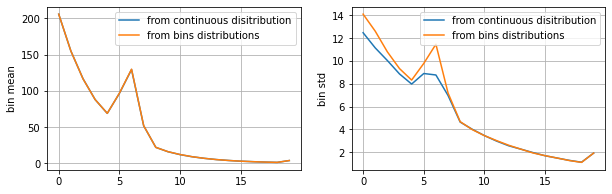

In [4]:
mb.plot_sample(hc, hb)

In [5]:
mc = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu])

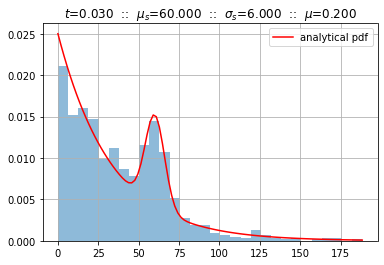

In [6]:
x = mc.rvs(n_events)
mc.plot_sample(x)

# Hypothesis testing
## $H_0$: There is no signal ($\mu$=0), using unbinned data

we use the likelihood as test-statistic

In [9]:
alpha=0.05
t, mu_s, sigma_s, mu = 0.03, 60, 6, 0

n = 4000 # number of experiments (each one with n_events) for empirical distributions

In [10]:
m_c0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu])

obtain a distribution of likelihoods given $H_0$

In [11]:
s_c0  = [m_c0.rvs(n_events) for _ in range(n)]
ts_c0 = np.r_[[m_c0.likelihood(i) for i in pbar(s_c0)]]
tslim_c0 = np.percentile(ts_c0, 100*(1-alpha))

100% (4000 of 4000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


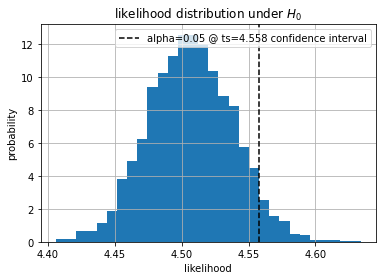

In [12]:
plt.hist(ts_c0, bins=30, density=True);
plt.title("likelihood distribution under $H_0$")
plt.grid(); plt.xlabel("likelihood"); plt.ylabel("probability");
plt.axvline(tslim_c0, color="black", ls="--", label="alpha=%.2f @ ts=%.3f confidence interval"%(alpha, tslim_c0))
plt.legend();

**assume our data sample is generated from an experiment where the actual $\mu \neq 0$**

In [13]:
real_mu = 0.1

In [14]:
m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, real_mu])
d_c1 = m_c1.rvs(n_events)

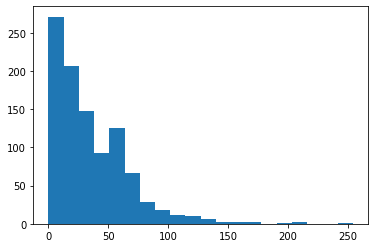

In [15]:
plt.hist(d_c1, bins=20);

the likelihood of that experiment given $H_0$

In [16]:
ts_d_c1 = m_c0.likelihood(d_c1).numpy()
print ("likelihood of d_c1 given H0 = %.2f"%ts_d_c1)
print ("H_0 rejected!!!" if ts_d_c1>tslim_c0 else "H_0 fail to reject")

likelihood of d_c1 given H0 = 4.59
H_0 rejected!!!


the probability of **correctly** rejecting $H_0$

In [17]:
p_reject_c0 = np.mean([m_c0.likelihood(m_c1.rvs(n_events)).numpy() > tslim_c0 for _  in pbar(range(1000))])
p_reject_c0

100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.741

observe that this probability increases or decreases with `n_events`

In [18]:
s_c0  = [m_c0.rvs(n_events//2) for _ in range(n)]
ts_c0 = np.r_[[m_c0.likelihood(i) for i in pbar(s_c0)]]
tslim_c0 = np.percentile(ts_c0, 100*(1-alpha))
print (tslim_c0)
np.mean([m_c0.likelihood(m_c1.rvs(n_events//2)).numpy() > tslim_c0 for _  in pbar(range(1000))])

100% (4000 of 4000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (228 of 1000) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00

4.580170589854281


100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.436

In [48]:
s_c0  = [m_c0.rvs(n_events*2) for _ in range(n)]
ts_c0 = np.r_[[m_c0.likelihood(i) for i in pbar(s_c0)]]
tslim_c0 = np.percentile(ts_c0, 100*(1-alpha))
print (tslim_c0)
np.mean([m_c0.likelihood(m_c1.rvs(n_events*2)).numpy() > tslim_c0 for _  in pbar(range(1000))])

100% (4000 of 4000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (228 of 1000) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00

4.542723945452906


100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.947

## $H_0$: There is no signal ($\mu$=0), using binned data


In [94]:
from importlib import reload
reload(h2)

<module 'local.lib.histos2d' from '/home/rlx/Dropbox/proyectos/2020-2DHISTOS/local/lib/histos2d.py'>

In [112]:
n_bins = 20
bin_edges = np.r_[list(np.linspace(0,180,n_bins))+[np.inf]]
bin_edges

array([  0.        ,   9.47368421,  18.94736842,  28.42105263,
        37.89473684,  47.36842105,  56.84210526,  66.31578947,
        75.78947368,  85.26315789,  94.73684211, 104.21052632,
       113.68421053, 123.15789474, 132.63157895, 142.10526316,
       151.57894737, 161.05263158, 170.52631579, 180.        ,
                inf])

In [97]:
m_b0 = h2.MLE_BinarizedSignalBg(n_events=n_events, bin_edges=bin_edges, params=[t, mu_s, sigma_s, mu])

obtain a distribution of likelihoods given $H_0$. Observe we sample from the continuous distribution and then binarize

In [99]:
s_b0 = m_b0.hrvs_c(n)


array([[111.,  84.,  68., ...,   0.,   0.,   3.],
       [ 92.,  86., 101., ...,   0.,   1.,   4.],
       [107., 124.,  74., ...,   0.,   2.,   1.],
       ...,
       [ 97.,  99.,  79., ...,   0.,   1.,   5.],
       [113.,  75.,  86., ...,   0.,   1.,   3.],
       [101., 103.,  83., ...,   0.,   0.,   3.]])

In [100]:
s_b0.shape

(4000, 50)

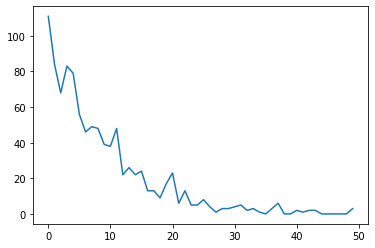

In [101]:
plt.plot(s_b0[0])

In [102]:
ts_b0 = np.r_[[m_b0.likelihood(i) for i in pbar(s_b0)]]

100% (4000 of 4000) |####################| Elapsed Time: 0:01:50 Time:  0:01:50


In [103]:
tslim_b0 = np.percentile(ts_b0, 100*(1-alpha))

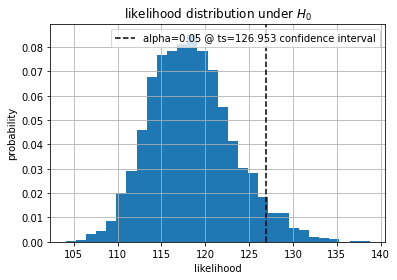

In [104]:
plt.hist(ts_b0, bins=30, density=True);
plt.title("likelihood distribution under $H_0$")
plt.grid(); plt.xlabel("likelihood"); plt.ylabel("probability");
plt.axvline(tslim_b0, color="black", ls="--", label="alpha=%.2f @ ts=%.3f confidence interval"%(alpha, tslim_b0))
plt.legend();

**assume our data sample is generated from an experiment where the actual $\mu \neq 0$**

In [108]:
m_b1 = h2.MLE_BinarizedSignalBg(n_events=n_events, bin_edges=bin_edges, params=[t, mu_s, sigma_s, real_mu])
d_b1 = m_b1.hrvs_c(1)[0]
d_b1

array([91., 82., 74., 77., 55., 52., 53., 34., 49., 39., 29., 32., 32.,
       32., 33., 33., 33., 31., 22., 20.,  8.,  6., 15.,  3.,  6.,  5.,
        4.,  9.,  0.,  1.,  4.,  2.,  2.,  4.,  3.,  2.,  3.,  2.,  1.,
        4.,  1.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  6.])

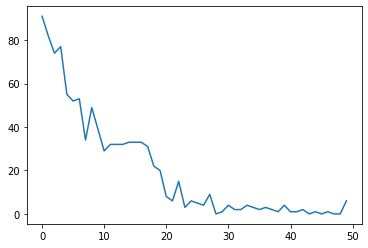

In [109]:
plt.plot(d_b1)

the likelihood of that experiment given $H_0$

In [110]:
ts_d_b1 = m_b0.likelihood(d_b1).numpy()
print ("likelihood of d_c1 given H0 = %.2f"%ts_d_b1)
print ("H_0 rejected!!!" if ts_d_b1>tslim_b0 else "H_0 fail to reject")

likelihood of d_c1 given H0 = 140.94
H_0 rejected!!!


the probability of **correctly** rejecting $H_0$

In [111]:
p_reject_c1 = np.mean([m_b0.likelihood(i).numpy()>tslim_b0 for i in pbar(m_b1.hrvs_c(1000))])
p_reject_c1

100% (1000 of 1000) |####################| Elapsed Time: 0:00:27 Time:  0:00:27


0.995

In [30]:
m_b0 = h2.MLE_BinarizedSignalBg(n_events=n_events//2, params=[t, mu_s, sigma_s, mu])
s_b0 = m_b0.hrvs_c(n)
ts_b0 = np.r_[[m_b0.likelihood(i) for i in pbar(s_b0)]]

m_b1 = h2.MLE_BinarizedSignalBg(n_events=n_events//2, params=[t, mu_s, sigma_s, real_mu])
tslim_b0 = np.percentile(ts_b0, 100*(1-alpha))
np.mean([m_b0.likelihood(i).numpy()>tslim_b0 for i in pbar(m_b1.hrvs_c(1000))])

100% (4000 of 4000) |####################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (1000 of 1000) |####################| Elapsed Time: 0:00:11 Time:  0:00:11


0.943